In [112]:
from scipy.io import arff
import pandas as pd
from sklearn import tree
from sklearn import metrics 
from sklearn.tree import _tree
import matplotlib.pyplot as plt
import dataframe_image as dfi
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from keras import Sequential
from keras.layers import Dense
from keras import layers

In [2]:
data = arff.loadarff('beans.arff')
df = pd.DataFrame(data[0])
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395.0,610.291,208.178117,173.888747,1.197191,0.549812,28715.0,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,b'SEKER'
1,28734.0,638.018,200.524796,182.734419,1.097356,0.411785,29172.0,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,b'SEKER'
2,29380.0,624.110,212.826130,175.931143,1.209713,0.562727,29690.0,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,b'SEKER'
3,30008.0,645.884,210.557999,182.516516,1.153638,0.498616,30724.0,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,b'SEKER'
4,30140.0,620.134,201.847882,190.279279,1.060798,0.333680,30417.0,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,b'SEKER'


In [3]:
train = df.sample(frac=0.7, random_state=100) 
test  = df.drop(train.index)

In [4]:
train_X = train.iloc[0:: , 0:16].copy()
train_y = train.iloc[0:: , 16:17].copy()
fixed_train_y = train_y["Class"].str.decode('utf-8')


test_X = test.iloc[0:: , 0:16].copy()
test_y = test.iloc[0:: , 16:17].copy()
fixed_test_y = test_y["Class"].str.decode('utf-8')

### Decision Tree Gini and entropy criterion

In [164]:
accuracy_test = []
accuracy_train = []
depth = []
leaves = []

number_of_nodes_gini = []
actual_depth_gini = []


number_of_nodes_entropy = []
actual_depth_entropy = []

alphas = []
for i in range(2, 50, 1):

    clf = tree.DecisionTreeClassifier(max_depth= i, criterion="gini", ccp_alpha = 0.0)
    
    clf = clf.fit(train_X.values, fixed_train_y)
    y_predicted_test = clf.predict(test_X.values)
    y_predicted_train = clf.predict(train_X.values)
    
    accuracy_test.append(metrics.accuracy_score(fixed_test_y, y_predicted_test))
    accuracy_train.append(metrics.accuracy_score(fixed_train_y, y_predicted_train))

    depth.append(i)
    leaves.append(clf.get_n_leaves())
    
number_of_nodes_gini.append(clf.tree_.node_count) 
actual_depth_gini.append(clf.tree_.max_depth)

    
accuracy_test_entropy = []
accuracy_train_entropy = []
depth_entropy = []
leaves_entropy = []

for i in range(2, 50, 1):

    clf = tree.DecisionTreeClassifier(max_depth= i, criterion="entropy", ccp_alpha = 0.0)
    
    clf = clf.fit(train_X.values, fixed_train_y)
    y_predicted_test = clf.predict(test_X.values)
    y_predicted_train = clf.predict(train_X.values)
    
    accuracy_test_entropy.append(metrics.accuracy_score(fixed_test_y, y_predicted_test))
    accuracy_train_entropy.append(metrics.accuracy_score(fixed_train_y, y_predicted_train))

    depth_entropy.append(i)
    leaves_entropy.append(clf.get_n_leaves())

    
number_of_nodes_entropy.append(clf.tree_.node_count) 
actual_depth_entropy.append(clf.tree_.max_depth)
alphas.append(0.0)


In [165]:
accuracy_test_0001 = []
accuracy_train_0001 = []
depth_0001 = []
leaves_0001 = []

for i in range(2, 50, 1):

    clf = tree.DecisionTreeClassifier(max_depth= i, criterion="gini", ccp_alpha = 0.0001)
    
    clf = clf.fit(train_X.values, fixed_train_y)
    y_predicted_test = clf.predict(test_X.values)
    y_predicted_train = clf.predict(train_X.values)
    
    accuracy_test_0001.append(metrics.accuracy_score(fixed_test_y, y_predicted_test))
    accuracy_train_0001.append(metrics.accuracy_score(fixed_train_y, y_predicted_train))

    depth_0001.append(i)
    leaves_0001.append(clf.get_n_leaves())
    
number_of_nodes_gini.append(clf.tree_.node_count) 
actual_depth_gini.append(clf.tree_.max_depth)

accuracy_test_0001_entropy = []
accuracy_train_0001_entropy = []
depth_0001_entropy = []
leaves_0001_entropy = []

for i in range(2, 50, 1):

    clf = tree.DecisionTreeClassifier(max_depth= i, criterion="entropy", ccp_alpha = 0.0001)
    
    clf = clf.fit(train_X.values, fixed_train_y)
    y_predicted_test = clf.predict(test_X.values)
    y_predicted_train = clf.predict(train_X.values)
    
    accuracy_test_0001_entropy.append(metrics.accuracy_score(fixed_test_y, y_predicted_test))
    accuracy_train_0001_entropy.append(metrics.accuracy_score(fixed_train_y, y_predicted_train))

    depth_0001_entropy.append(i)
    leaves_0001_entropy.append(clf.get_n_leaves()) 
    
number_of_nodes_entropy.append(clf.tree_.node_count) 
actual_depth_entropy.append(clf.tree_.max_depth)
alphas.append(0.0001)

    
    
 

In [166]:
accuracy_test_001 = []
accuracy_train_001 = []
depth_001 = []
leaves_001 = []

for i in range(2, 50, 1):

    clf = tree.DecisionTreeClassifier(max_depth= i, criterion="gini", ccp_alpha = 0.001)
    
    clf = clf.fit(train_X.values, fixed_train_y)
    y_predicted_test = clf.predict(test_X.values)
    y_predicted_train = clf.predict(train_X.values)
    
    accuracy_test_001.append(metrics.accuracy_score(fixed_test_y, y_predicted_test))
    accuracy_train_001.append(metrics.accuracy_score(fixed_train_y, y_predicted_train))

    depth_001.append(i)
    leaves_001.append(clf.get_n_leaves())
    
    
number_of_nodes_gini.append(clf.tree_.node_count) 
actual_depth_gini.append(clf.tree_.max_depth)

accuracy_test_001_entropy = []
accuracy_train_001_entropy = []
depth_001_entropy = []
leaves_001_entropy = []

for i in range(2, 50, 1):

    clf = tree.DecisionTreeClassifier(max_depth= i, criterion="entropy", ccp_alpha = 0.001)
    
    clf = clf.fit(train_X.values, fixed_train_y)
    y_predicted_test = clf.predict(test_X.values)
    y_predicted_train = clf.predict(train_X.values)
    
    accuracy_test_001_entropy.append(metrics.accuracy_score(fixed_test_y, y_predicted_test))
    accuracy_train_001_entropy.append(metrics.accuracy_score(fixed_train_y, y_predicted_train))

    depth_001_entropy.append(i)
    leaves_001_entropy.append(clf.get_n_leaves())    
    
number_of_nodes_entropy.append(clf.tree_.node_count) 
actual_depth_entropy.append(clf.tree_.max_depth)
alphas.append(0.001)
   



In [167]:
    
accuracy_test_01 = []
accuracy_train_01 = []
depth_01 = []
leaves_01 = []

for i in range(2, 50, 1):

    clf = tree.DecisionTreeClassifier(max_depth= i, criterion="gini", ccp_alpha = 0.01)
    
    clf = clf.fit(train_X.values, fixed_train_y)
    y_predicted_test = clf.predict(test_X.values)
    y_predicted_train = clf.predict(train_X.values)
    
    accuracy_test_01.append(metrics.accuracy_score(fixed_test_y, y_predicted_test))
    accuracy_train_01.append(metrics.accuracy_score(fixed_train_y, y_predicted_train))

    depth_01.append(i)
    leaves_01.append(clf.get_n_leaves())

number_of_nodes_gini.append(clf.tree_.node_count) 
actual_depth_gini.append(clf.tree_.max_depth)

accuracy_test_01_entropy = []
accuracy_train_01_entropy = []
depth_01_entropy = []
leaves_01_entropy = []

for i in range(2, 50, 1):

    clf = tree.DecisionTreeClassifier(max_depth= i, criterion="entropy", ccp_alpha = 0.01)
    
    clf = clf.fit(train_X.values, fixed_train_y)
    y_predicted_test = clf.predict(test_X.values)
    y_predicted_train = clf.predict(train_X.values)
    
    accuracy_test_01_entropy.append(metrics.accuracy_score(fixed_test_y, y_predicted_test))
    accuracy_train_01_entropy.append(metrics.accuracy_score(fixed_train_y, y_predicted_train))

    depth_01_entropy.append(i)
    leaves_01_entropy.append(clf.get_n_leaves())  
    
number_of_nodes_entropy.append(clf.tree_.node_count) 
actual_depth_entropy.append(clf.tree_.max_depth)
alphas.append(0.01)
   

In [168]:
accuracy_test_1 = []
accuracy_train_1 = []
depth_1 = []
leaves_1 = []

for i in range(2, 50, 1):

    clf = tree.DecisionTreeClassifier(max_depth= i, criterion="gini", ccp_alpha = 0.1)
    
    clf = clf.fit(train_X.values, fixed_train_y)
    y_predicted_test = clf.predict(test_X.values)
    y_predicted_train = clf.predict(train_X.values)
    
    accuracy_test_1.append(metrics.accuracy_score(fixed_test_y, y_predicted_test))
    accuracy_train_1.append(metrics.accuracy_score(fixed_train_y, y_predicted_train))

    depth_1.append(i)
    leaves_1.append(clf.get_n_leaves())
    
number_of_nodes_gini.append(clf.tree_.node_count) 
actual_depth_gini.append(clf.tree_.max_depth)    
accuracy_test_1_entropy = []
accuracy_train_1_entropy = []
depth_1_entropy = []
leaves_1_entropy = []

for i in range(2, 50, 1):

    clf = tree.DecisionTreeClassifier(max_depth= i, criterion="entropy", ccp_alpha = 0.1)
    
    clf = clf.fit(train_X.values, fixed_train_y)
    y_predicted_test = clf.predict(test_X.values)
    y_predicted_train = clf.predict(train_X.values)
    
    accuracy_test_1_entropy.append(metrics.accuracy_score(fixed_test_y, y_predicted_test))
    accuracy_train_1_entropy.append(metrics.accuracy_score(fixed_train_y, y_predicted_train))

    depth_1_entropy.append(i)
    leaves_1_entropy.append(clf.get_n_leaves())    
    
number_of_nodes_entropy.append(clf.tree_.node_count) 
actual_depth_entropy.append(clf.tree_.max_depth)
alphas.append(0.1)

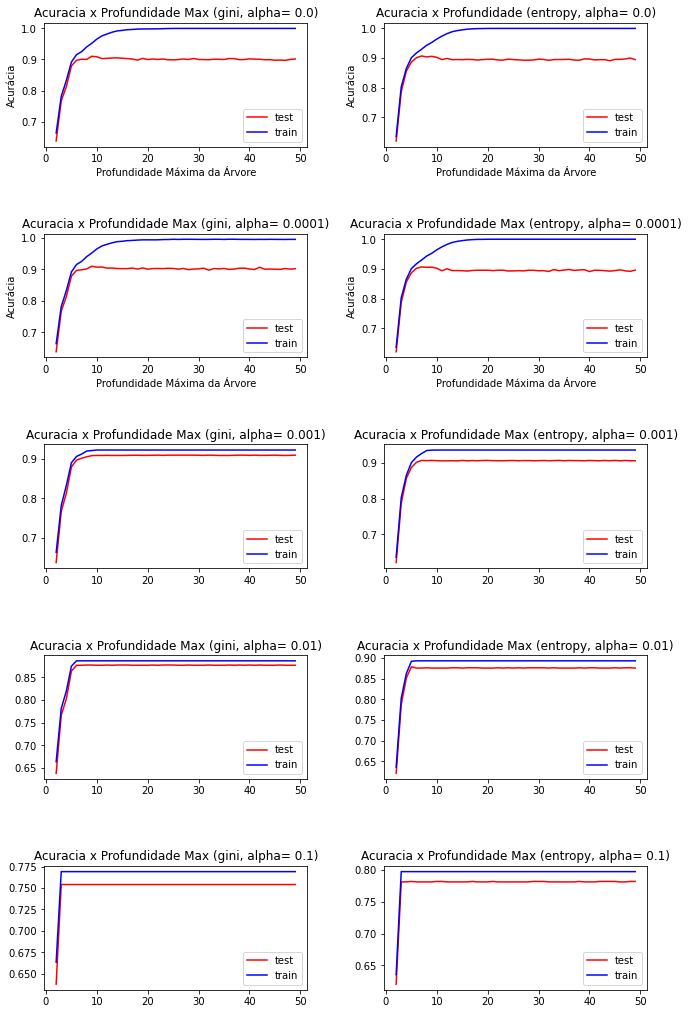

In [169]:

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10, 15))




axes[0][0].plot(depth, accuracy_test, color='red', label="test")
axes[0][0].plot(depth, accuracy_train, color='blue', label="train")

axes[0][1].plot(depth_entropy, accuracy_test_entropy, color='red', label="test")
axes[0][1].plot(depth_entropy, accuracy_train_entropy, color='blue', label="train")



axes[1][0].plot(depth_0001, accuracy_test_0001, color='red', label="test")
axes[1][0].plot(depth_0001, accuracy_train_0001, color='blue', label="train")

axes[1][1].plot(depth_0001_entropy, accuracy_test_0001_entropy, color='red', label="test")
axes[1][1].plot(depth_0001_entropy, accuracy_train_0001_entropy, color='blue', label="train")





axes[2][0].plot(depth_001, accuracy_test_001, color='red', label="test")
axes[2][0].plot(depth_001, accuracy_train_001, color='blue', label="train")

axes[2][1].plot(depth_001_entropy, accuracy_test_001_entropy, color='red', label="test")
axes[2][1].plot(depth_001_entropy, accuracy_train_001_entropy, color='blue', label="train")


axes[3][0].plot(depth_01, accuracy_test_01, color='red', label="test")
axes[3][0].plot(depth_01, accuracy_train_01, color='blue', label="train")

axes[3][1].plot(depth_01_entropy, accuracy_test_01_entropy, color='red', label="test")
axes[3][1].plot(depth_01_entropy, accuracy_train_01_entropy, color='blue', label="train")


axes[4][0].plot(depth_1, accuracy_test_1, color='red', label="test")
axes[4][0].plot(depth_1, accuracy_train_1, color='blue', label="train")
axes[4][1].plot(depth_1_entropy, accuracy_test_1_entropy, color='red', label="test")
axes[4][1].plot(depth_1_entropy, accuracy_train_1_entropy, color='blue', label="train")


axes[0][0].legend()
axes[0][1].legend()

axes[1][0].legend()
axes[1][1].legend()
axes[2][0].legend()
axes[2][1].legend()
axes[3][0].legend()
axes[3][1].legend()
axes[4][0].legend()
axes[4][1].legend()

axes[0][0].title.set_text('Acuracia x Profundidade Max (gini, alpha= 0.0)')
axes[0][1].title.set_text('Acuracia x Profundidade (entropy, alpha= 0.0)')

axes[1][0].title.set_text('Acuracia x Profundidade Max (gini, alpha= 0.0001)')
axes[1][1].title.set_text('Acuracia x Profundidade Max (entropy, alpha= 0.0001)')

axes[2][0].title.set_text('Acuracia x Profundidade Max (gini, alpha= 0.001)')
axes[2][1].title.set_text('Acuracia x Profundidade Max (entropy, alpha= 0.001)')

axes[3][0].title.set_text('Acuracia x Profundidade Max (gini, alpha= 0.01)')
axes[3][1].title.set_text('Acuracia x Profundidade Max (entropy, alpha= 0.01)')

axes[4][0].title.set_text('Acuracia x Profundidade Max (gini, alpha= 0.1)')
axes[4][1].title.set_text('Acuracia x Profundidade Max (entropy, alpha= 0.1)')


axes[0][0].set_ylabel('Acurácia')
axes[0][0].set_xlabel('Profundidade Máxima da Árvore')
axes[0][1].set_ylabel('Acurácia')
axes[0][1].set_xlabel('Profundidade Máxima da Árvore')
axes[1][0].set_ylabel('Acurácia')
axes[1][0].set_xlabel('Profundidade Máxima da Árvore')
axes[1][1].set_ylabel('Acurácia')
axes[1][1].set_xlabel('Profundidade Máxima da Árvore')



fig.tight_layout(pad=4)

fig.savefig('questão3-result-arvore.png')

[1241, 1063, 67, 19, 9]
[26, 26, 10, 6, 3]
[1155, 1155, 185, 39, 11]
[21, 22, 11, 6, 3]
[0.0, 0.0001, 0.001, 0.01, 0.1]


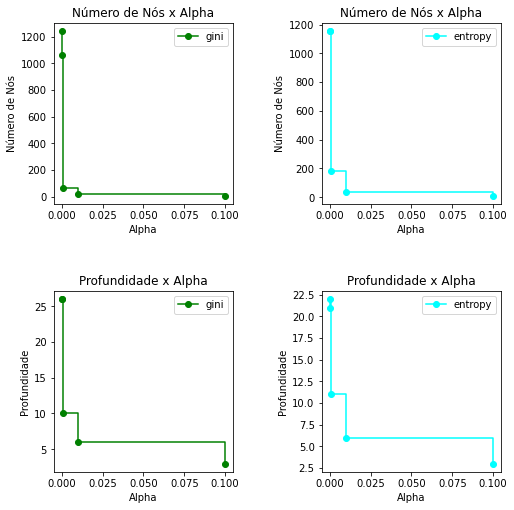

In [191]:
node_counts = clf.tree_.node_count
depths = clf.tree_.max_depth 

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))



print(number_of_nodes_gini)
print(actual_depth_gini)
print(number_of_nodes_entropy)
print(actual_depth_entropy)
print(alphas)


axes[0][0].plot(alphas, number_of_nodes_gini, color='green', label="gini",marker="o", drawstyle="steps-post")
axes[0][1].plot(alphas, number_of_nodes_entropy,  color='cyan', label="entropy",  marker="o", drawstyle="steps-post")

axes[1][0].plot(alphas, actual_depth_gini, color='green', label="gini", marker="o", drawstyle="steps-post")
axes[1][1].plot(alphas, actual_depth_entropy,  color='cyan', label="entropy",  marker="o", drawstyle="steps-post")

axes[0][0].legend()
axes[0][1].legend()
axes[1][0].legend()
axes[1][1].legend()

axes[0][0].title.set_text('Número de Nós x Alpha')
axes[0][1].title.set_text('Número de Nós x Alpha')

axes[1][0].title.set_text('Profundidade x Alpha')
axes[1][1].title.set_text('Profundidade x Alpha')


axes[0][0].set_ylabel('Número de Nós')
axes[0][0].set_xlabel('Alpha')

axes[0][1].set_ylabel('Número de Nós')
axes[0][1].set_xlabel('Alpha')

axes[1][0].set_ylabel('Profundidade')
axes[1][0].set_xlabel('Alpha')

axes[1][1].set_ylabel('Profundidade')
axes[1][1].set_xlabel('Alpha')

fig.tight_layout(pad=4)
fig.savefig('questão3-result-alphas.png')

### MLP

In [76]:
df = pd.read_csv("../datasets/chess.data", sep=",")

lbl_white_king=LabelEncoder()
df['white_king_file']=lbl_white_king.fit_transform(df['white_king_file'])
lbl_white_rook=LabelEncoder()
df['white_rook_file']=lbl_white_rook.fit_transform(df['white_rook_file'])
lbl_black_king=LabelEncoder()
df['black_king_file']=lbl_black_king.fit_transform(df['black_king_file'])
lbl_result=LabelEncoder()
df['result']=lbl_result.fit_transform(df['result'])


train = df.sample(frac=0.7, random_state=100) #random state is a seed value
test  = df.drop(train.index)

train_x = train.iloc[0::,0:6].copy()
train_y = train.iloc[0::,6:7].copy()


test_x = test.iloc[0::,0:6].copy()
test_y = test.iloc[0::,6:7].copy()

trn_Y = to_categorical(train_y)
tst_Y = to_categorical(test_y)

### 3 camadas

In [79]:

model = Sequential()

model.add(layers.Dense(150, activation='sigmoid', input_dim=len(df.columns)-1))
model.add(layers.Dense(100, activation='softmax'))
model.add(layers.Dense(50, activation='softmax'))
model.add(layers.Dense(18, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_x, trn_Y, batch_size=128, epochs=1000, verbose=False, 
    validation_data=(test_x, tst_Y)
).history

model2 = Sequential()

model2.add(layers.Dense(100, activation='sigmoid', input_dim=len(df.columns)-1))
model2.add(layers.Dense(50, activation='softmax'))
model2.add(layers.Dense(25, activation='softmax'))
model2.add(layers.Dense(18, activation='softmax'))
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history2 = model2.fit(
    train_x, trn_Y, batch_size=128, epochs=1000, verbose=False, 
    validation_data=(test_x, tst_Y)
).history

model3 = Sequential()

model3.add(layers.Dense(50, activation='sigmoid', input_dim=len(df.columns)-1))
model3.add(layers.Dense(25, activation='softmax'))
model3.add(layers.Dense(12, activation='softmax'))
model3.add(layers.Dense(18, activation='softmax'))
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history3 = model3.fit(
    train_x, trn_Y, batch_size=128, epochs=1000, verbose=False, 
    validation_data=(test_x, tst_Y)
).history


epochs = range(1, len(history['loss']) + 1)

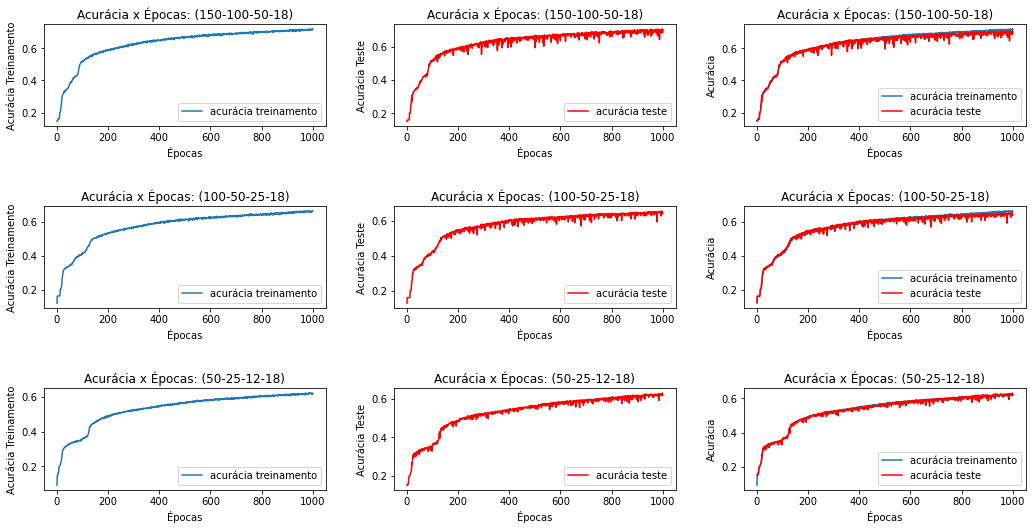

In [133]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 8))



axes[0][0].plot(epochs, history['accuracy'], color='C0', label='acurácia treinamento')
axes[0][1].plot(epochs, history['val_accuracy'], color='red', label='acurácia teste')
axes[0][2].plot(epochs, history['accuracy'], color='C0', label='acurácia treinamento')
axes[0][2].plot(epochs, history['val_accuracy'], color='red', label='acurácia teste')


axes[1][0].plot(epochs, history2['accuracy'], color='C0', label='acurácia treinamento')
axes[1][1].plot(epochs, history2['val_accuracy'], color='red', label='acurácia teste')
axes[1][2].plot(epochs, history2['accuracy'], color='C0', label='acurácia treinamento')
axes[1][2].plot(epochs, history2['val_accuracy'], color='red', label='acurácia teste')


axes[2][0].plot(epochs, history3['accuracy'], color='C0', label='acurácia treinamento')
axes[2][1].plot(epochs, history3['val_accuracy'], color='red', label='acurácia teste')
axes[2][2].plot(epochs, history3['accuracy'], color='C0', label='acurácia treinamento')
axes[2][2].plot(epochs, history3['val_accuracy'], color='red', label='acurácia teste')

axes[0][0].legend()
axes[0][1].legend()
axes[0][2].legend()
axes[1][0].legend()
axes[1][1].legend()
axes[1][2].legend()
axes[2][0].legend()
axes[2][1].legend()
axes[2][2].legend()

axes[0][0].title.set_text('Acurácia x Épocas: (150-100-50-18)')
axes[0][1].title.set_text('Acurácia x Épocas: (150-100-50-18)')
axes[0][2].title.set_text('Acurácia x Épocas: (150-100-50-18)')

axes[0][0].set_ylabel('Acurácia Treinamento')
axes[0][0].set_xlabel('Épocas')
axes[0][1].set_ylabel('Acurácia Teste')
axes[0][1].set_xlabel('Épocas')
axes[0][2].set_ylabel('Acurácia')
axes[0][2].set_xlabel('Épocas')



axes[1][0].title.set_text('Acurácia x Épocas: (100-50-25-18)')
axes[1][1].title.set_text('Acurácia x Épocas: (100-50-25-18)')
axes[1][2].title.set_text('Acurácia x Épocas: (100-50-25-18)')
axes[1][0].set_ylabel('Acurácia Treinamento')
axes[1][0].set_xlabel('Épocas')
axes[1][1].set_ylabel('Acurácia Teste')
axes[1][1].set_xlabel('Épocas')
axes[1][2].set_ylabel('Acurácia')
axes[1][2].set_xlabel('Épocas')


axes[2][0].title.set_text('Acurácia x Épocas: (50-25-12-18)')
axes[2][1].title.set_text('Acurácia x Épocas: (50-25-12-18)')
axes[2][2].title.set_text('Acurácia x Épocas: (50-25-12-18)')
axes[2][0].set_ylabel('Acurácia Treinamento')
axes[2][0].set_xlabel('Épocas')
axes[2][1].set_ylabel('Acurácia Teste')
axes[2][1].set_xlabel('Épocas')
axes[2][2].set_ylabel('Acurácia')
axes[2][2].set_xlabel('Épocas')

fig.tight_layout(pad=3)

fig.savefig('questão3-result-mlp-3camadas.png')

### 2 Camadas

In [86]:

model4 = Sequential()
model4.add(layers.Dense(50, activation='sigmoid', input_dim=len(df.columns)-1))
model4.add(layers.Dense(25, activation='softmax'))
model4.add(layers.Dense(18, activation='softmax'))
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history4 = model4.fit(
    train_x, trn_Y, batch_size=128, epochs=1000, verbose=False, 
    validation_data=(test_x, tst_Y)
).history


model5 = Sequential()
model5.add(layers.Dense(25, activation='sigmoid', input_dim=len(df.columns)-1))
model5.add(layers.Dense(12, activation='softmax'))
model5.add(layers.Dense(18, activation='softmax'))
model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history5 = model5.fit(
    train_x, trn_Y, batch_size=128, epochs=1000, verbose=False, 
    validation_data=(test_x, tst_Y)
).history


model6 = Sequential()
model6.add(layers.Dense(12, activation='sigmoid', input_dim=len(df.columns)-1))
model6.add(layers.Dense(4, activation='softmax'))
model6.add(layers.Dense(18, activation='softmax'))
model6.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history6 = model6.fit(
    train_x, trn_Y, batch_size=128, epochs=1000, verbose=False, 
    validation_data=(test_x, tst_Y)
).history
epochs = range(1, len(history['loss']) + 1)

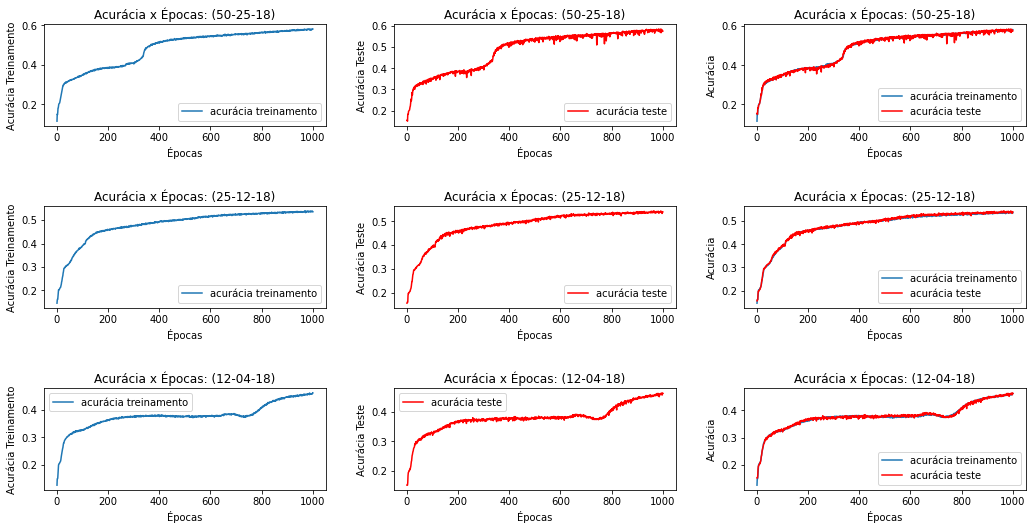

In [135]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 8))



axes[0][0].plot(epochs, history4['accuracy'], color='C0', label='acurácia treinamento')
axes[0][1].plot(epochs, history4['val_accuracy'], color='red', label='acurácia teste')
axes[0][2].plot(epochs, history4['accuracy'], color='C0', label='acurácia treinamento')
axes[0][2].plot(epochs, history4['val_accuracy'], color='red', label='acurácia teste')


axes[1][0].plot(epochs, history5['accuracy'], color='C0', label='acurácia treinamento')
axes[1][1].plot(epochs, history5['val_accuracy'], color='red', label='acurácia teste')
axes[1][2].plot(epochs, history5['accuracy'], color='C0', label='acurácia treinamento')
axes[1][2].plot(epochs, history5['val_accuracy'], color='red', label='acurácia teste')


axes[2][0].plot(epochs, history6['accuracy'], color='C0', label='acurácia treinamento')
axes[2][1].plot(epochs, history6['val_accuracy'], color='red', label='acurácia teste')
axes[2][2].plot(epochs, history6['accuracy'], color='C0', label='acurácia treinamento')
axes[2][2].plot(epochs, history6['val_accuracy'], color='red', label='acurácia teste')

axes[0][0].legend()
axes[0][1].legend()
axes[0][2].legend()
axes[1][0].legend()
axes[1][1].legend()
axes[1][2].legend()
axes[2][0].legend()
axes[2][1].legend()
axes[2][2].legend()

axes[0][0].title.set_text('Acurácia x Épocas: (50-25-18)')
axes[0][1].title.set_text('Acurácia x Épocas: (50-25-18)')
axes[0][2].title.set_text('Acurácia x Épocas: (50-25-18)')

axes[0][0].set_ylabel('Acurácia Treinamento')
axes[0][0].set_xlabel('Épocas')
axes[0][1].set_ylabel('Acurácia Teste')
axes[0][1].set_xlabel('Épocas')
axes[0][2].set_ylabel('Acurácia')
axes[0][2].set_xlabel('Épocas')



axes[1][0].title.set_text('Acurácia x Épocas: (25-12-18)')
axes[1][1].title.set_text('Acurácia x Épocas: (25-12-18)')
axes[1][2].title.set_text('Acurácia x Épocas: (25-12-18)')
axes[1][0].set_ylabel('Acurácia Treinamento')
axes[1][0].set_xlabel('Épocas')
axes[1][1].set_ylabel('Acurácia Teste')
axes[1][1].set_xlabel('Épocas')
axes[1][2].set_ylabel('Acurácia')
axes[1][2].set_xlabel('Épocas')


axes[2][0].title.set_text('Acurácia x Épocas: (12-04-18)')
axes[2][1].title.set_text('Acurácia x Épocas: (12-04-18)')
axes[2][2].title.set_text('Acurácia x Épocas: (12-04-18)')
axes[2][0].set_ylabel('Acurácia Treinamento')
axes[2][0].set_xlabel('Épocas')
axes[2][1].set_ylabel('Acurácia Teste')
axes[2][1].set_xlabel('Épocas')
axes[2][2].set_ylabel('Acurácia')
axes[2][2].set_xlabel('Épocas')

fig.tight_layout(pad=3)

fig.savefig('questão3-result-mlp-2camadas.png')

### 1 Camada

In [101]:
model7 = Sequential()
model7.add(layers.Dense(100, activation='sigmoid', input_dim=len(df.columns)-1))
model7.add(layers.Dense(18, activation='softmax'))
model7.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history7 = model7.fit(
    train_x, trn_Y, batch_size=128, epochs=1000, verbose=False, 
    validation_data=(test_x, tst_Y)
).history


model8 = Sequential()
model8.add(layers.Dense(50, activation='sigmoid', input_dim=len(df.columns)-1))
model8.add(layers.Dense(18, activation='softmax'))
model8.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history8 = model8.fit(
    train_x, trn_Y, batch_size=128, epochs=1000, verbose=False, 
    validation_data=(test_x, tst_Y)
).history


model9 = Sequential()
model9.add(layers.Dense(25, activation='sigmoid', input_dim=len(df.columns)-1))
model9.add(layers.Dense(18, activation='softmax'))
model9.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history9 = model9.fit(
    train_x, trn_Y, batch_size=128, epochs=1000, verbose=False, 
    validation_data=(test_x, tst_Y)
).history
epochs = range(1, len(history['loss']) + 1)

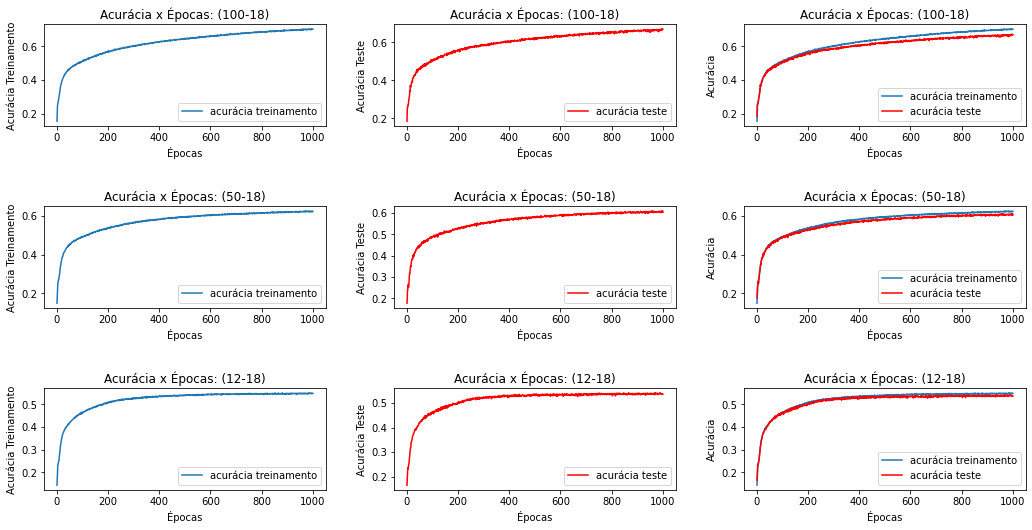

In [137]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 8))



axes[0][0].plot(epochs, history7['accuracy'], color='C0', label='acurácia treinamento')
axes[0][1].plot(epochs, history7['val_accuracy'], color='red', label='acurácia teste')
axes[0][2].plot(epochs, history7['accuracy'], color='C0', label='acurácia treinamento')
axes[0][2].plot(epochs, history7['val_accuracy'], color='red', label='acurácia teste')


axes[1][0].plot(epochs, history8['accuracy'], color='C0', label='acurácia treinamento')
axes[1][1].plot(epochs, history8['val_accuracy'], color='red', label='acurácia teste')
axes[1][2].plot(epochs, history8['accuracy'], color='C0', label='acurácia treinamento')
axes[1][2].plot(epochs, history8['val_accuracy'], color='red', label='acurácia teste')


axes[2][0].plot(epochs, history9['accuracy'], color='C0', label='acurácia treinamento')
axes[2][1].plot(epochs, history9['val_accuracy'], color='red', label='acurácia teste')
axes[2][2].plot(epochs, history9['accuracy'], color='C0', label='acurácia treinamento')
axes[2][2].plot(epochs, history9['val_accuracy'], color='red', label='acurácia teste')

axes[0][0].legend()
axes[0][1].legend()
axes[0][2].legend()
axes[1][0].legend()
axes[1][1].legend()
axes[1][2].legend()
axes[2][0].legend()
axes[2][1].legend()
axes[2][2].legend()

axes[0][0].title.set_text('Acurácia x Épocas: (100-18)')
axes[0][1].title.set_text('Acurácia x Épocas: (100-18)')
axes[0][2].title.set_text('Acurácia x Épocas: (100-18)')

axes[0][0].set_ylabel('Acurácia Treinamento')
axes[0][0].set_xlabel('Épocas')
axes[0][1].set_ylabel('Acurácia Teste')
axes[0][1].set_xlabel('Épocas')
axes[0][2].set_ylabel('Acurácia')
axes[0][2].set_xlabel('Épocas')



axes[1][0].title.set_text('Acurácia x Épocas: (50-18)')
axes[1][1].title.set_text('Acurácia x Épocas: (50-18)')
axes[1][2].title.set_text('Acurácia x Épocas: (50-18)')
axes[1][0].set_ylabel('Acurácia Treinamento')
axes[1][0].set_xlabel('Épocas')
axes[1][1].set_ylabel('Acurácia Teste')
axes[1][1].set_xlabel('Épocas')
axes[1][2].set_ylabel('Acurácia')
axes[1][2].set_xlabel('Épocas')


axes[2][0].title.set_text('Acurácia x Épocas: (12-18)')
axes[2][1].title.set_text('Acurácia x Épocas: (12-18)')
axes[2][2].title.set_text('Acurácia x Épocas: (12-18)')
axes[2][0].set_ylabel('Acurácia Treinamento')
axes[2][0].set_xlabel('Épocas')
axes[2][1].set_ylabel('Acurácia Teste')
axes[2][1].set_xlabel('Épocas')
axes[2][2].set_ylabel('Acurácia')
axes[2][2].set_xlabel('Épocas')

fig.tight_layout(pad=3)

fig.savefig('questão3-result-mlp-1camadas.png')

### Activation

In [192]:
model10 = Sequential()

model10.add(layers.Dense(100, activation='sigmoid', input_dim=len(df.columns)-1))
model10.add(layers.Dense(18, activation='softmax'))
model10.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history10 = model10.fit(
    train_x, trn_Y, batch_size=128, epochs=1000, verbose=False, 
    validation_data=(test_x, tst_Y)
).history


model11 = Sequential()
model11.add(layers.Dense(100, activation='softmax', input_dim=len(df.columns)-1))
model11.add(layers.Dense(18, activation='softmax'))
model11.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history11 = model11.fit(
    train_x, trn_Y, batch_size=128, epochs=1000, verbose=False, 
    validation_data=(test_x, tst_Y)
).history

model12 = Sequential()
model12.add(layers.Dense(100, activation='relu', input_dim=len(df.columns)-1))
model12.add(layers.Dense(18, activation='softmax'))
model12.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history12 = model12.fit(
    train_x, trn_Y, batch_size=128, epochs=1000, verbose=False, 
    validation_data=(test_x, tst_Y)
).history



epochs = range(1, len(history['loss']) + 1)

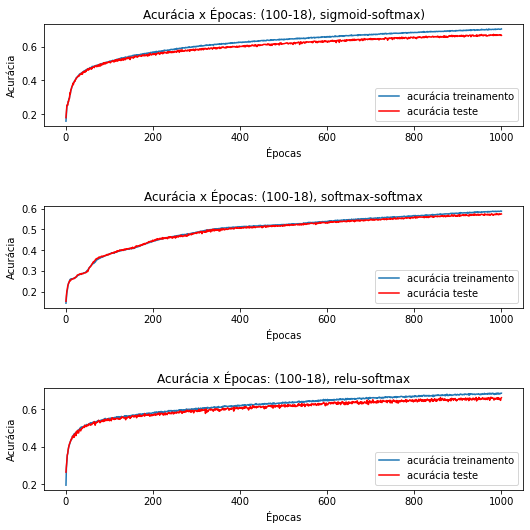

In [193]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 8))



axes[0].plot(epochs, history10['accuracy'], color='C0', label='acurácia treinamento')
axes[0].plot(epochs, history10['val_accuracy'], color='red', label='acurácia teste')

axes[1].plot(epochs, history11['accuracy'], color='C0', label='acurácia treinamento')
axes[1].plot(epochs, history11['val_accuracy'], color='red', label='acurácia teste')


axes[2].plot(epochs, history12['accuracy'], color='C0', label='acurácia treinamento')
axes[2].plot(epochs, history12['val_accuracy'], color='red', label='acurácia teste')


axes[0].legend()
axes[1].legend()
axes[2].legend()


axes[0].title.set_text('Acurácia x Épocas: (100-18), sigmoid-softmax)')
axes[1].title.set_text('Acurácia x Épocas: (100-18), softmax-softmax')
axes[2].title.set_text('Acurácia x Épocas: (100-18), relu-softmax')


axes[0].set_ylabel('Acurácia')
axes[0].set_xlabel('Épocas')

axes[1].set_ylabel('Acurácia')
axes[1].set_xlabel('Épocas')

axes[2].set_ylabel('Acurácia')
axes[2].set_xlabel('Épocas')





fig.tight_layout(pad=3)

fig.savefig('questão3-result-mlp-1camadas-activation.png')

### Loss

In [194]:
model13 = Sequential()

model13.add(layers.Dense(100, activation='sigmoid', input_dim=len(df.columns)-1))
model13.add(layers.Dense(18, activation='softmax'))
model13.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history13 = model13.fit(
    train_x, trn_Y, batch_size=128, epochs=1000, verbose=False, 
    validation_data=(test_x, tst_Y)
).history


model14 = Sequential()
model14.add(layers.Dense(100, activation='sigmoid', input_dim=len(df.columns)-1))
model14.add(layers.Dense(18, activation='softmax'))
model14.compile(optimizer='adam', loss= keras.losses.Poisson(), metrics=['accuracy'])

history14 = model14.fit(
    train_x, trn_Y, batch_size=128, epochs=1000, verbose=False, 
    validation_data=(test_x, tst_Y)
).history

model15 = Sequential()
model15.add(layers.Dense(100, activation='sigmoid', input_dim=len(df.columns)-1))
model15.add(layers.Dense(18, activation='softmax'))
model15.compile(optimizer='adam', loss=keras.losses.KLDivergence(), metrics=['accuracy'])

history15 = model15.fit(
    train_x, trn_Y, batch_size=128, epochs=1000, verbose=False, 
    validation_data=(test_x, tst_Y)
).history



epochs = range(1, len(history['loss']) + 1)

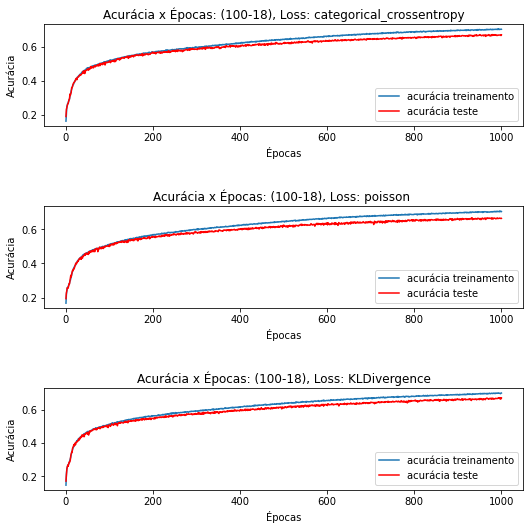

In [195]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 8))



axes[0].plot(epochs, history13['accuracy'], color='C0', label='acurácia treinamento')
axes[0].plot(epochs, history13['val_accuracy'], color='red', label='acurácia teste')

axes[1].plot(epochs, history14['accuracy'], color='C0', label='acurácia treinamento')
axes[1].plot(epochs, history14['val_accuracy'], color='red', label='acurácia teste')


axes[2].plot(epochs, history15['accuracy'], color='C0', label='acurácia treinamento')
axes[2].plot(epochs, history15['val_accuracy'], color='red', label='acurácia teste')


axes[0].legend()
axes[1].legend()
axes[2].legend()


axes[0].title.set_text('Acurácia x Épocas: (100-18), Loss: categorical_crossentropy')
axes[1].title.set_text('Acurácia x Épocas: (100-18), Loss: poisson ')
axes[2].title.set_text('Acurácia x Épocas: (100-18), Loss: KLDivergence')


axes[0].set_ylabel('Acurácia')
axes[0].set_xlabel('Épocas')

axes[1].set_ylabel('Acurácia')
axes[1].set_xlabel('Épocas')

axes[2].set_ylabel('Acurácia')
axes[2].set_xlabel('Épocas')





fig.tight_layout(pad=3)

fig.savefig('questão3-result-mlp-1camadas-loss.png')

### Optimizer

In [196]:
model16 = Sequential()

model16.add(layers.Dense(100, activation='sigmoid', input_dim=len(df.columns)-1))
model16.add(layers.Dense(18, activation='softmax'))
model16.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history16 = model16.fit(
    train_x, trn_Y, batch_size=128, epochs=1000, verbose=False, 
    validation_data=(test_x, tst_Y)
).history


model17 = Sequential()
model17.add(layers.Dense(100, activation='sigmoid', input_dim=len(df.columns)-1))
model17.add(layers.Dense(18, activation='softmax'))
model17.compile(optimizer='adamax', loss= 'categorical_crossentropy', metrics=['accuracy'])

history17 = model17.fit(
    train_x, trn_Y, batch_size=128, epochs=1000, verbose=False, 
    validation_data=(test_x, tst_Y)
).history

model18 = Sequential()
model18.add(layers.Dense(100, activation='sigmoid', input_dim=len(df.columns)-1))
model18.add(layers.Dense(18, activation='softmax'))
model18.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history18 = model18.fit(
    train_x, trn_Y, batch_size=128, epochs=1000, verbose=False, 
    validation_data=(test_x, tst_Y)
).history



epochs = range(1, len(history['loss']) + 1)

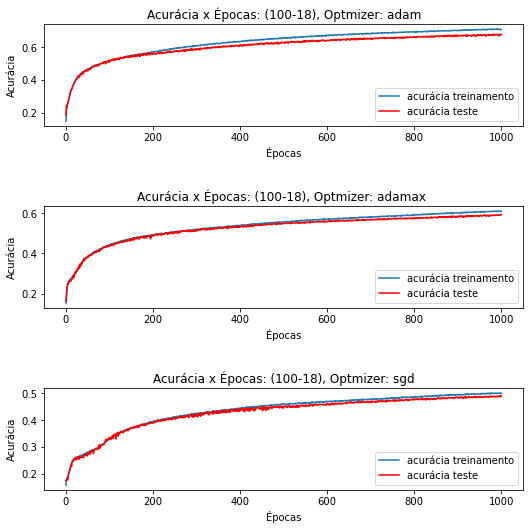

In [197]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 8))



axes[0].plot(epochs, history16['accuracy'], color='C0', label='acurácia treinamento')
axes[0].plot(epochs, history16['val_accuracy'], color='red', label='acurácia teste')

axes[1].plot(epochs, history17['accuracy'], color='C0', label='acurácia treinamento')
axes[1].plot(epochs, history17['val_accuracy'], color='red', label='acurácia teste')


axes[2].plot(epochs, history18['accuracy'], color='C0', label='acurácia treinamento')
axes[2].plot(epochs, history18['val_accuracy'], color='red', label='acurácia teste')


axes[0].legend()
axes[1].legend()
axes[2].legend()


axes[0].title.set_text('Acurácia x Épocas: (100-18), Optmizer: adam')
axes[1].title.set_text('Acurácia x Épocas: (100-18), Optmizer: adamax ')
axes[2].title.set_text('Acurácia x Épocas: (100-18), Optmizer: sgd')


axes[0].set_ylabel('Acurácia')
axes[0].set_xlabel('Épocas')

axes[1].set_ylabel('Acurácia')
axes[1].set_xlabel('Épocas')

axes[2].set_ylabel('Acurácia')
axes[2].set_xlabel('Épocas')





fig.tight_layout(pad=3)

fig.savefig('questão3-result-mlp-1camadas-ooptimizer.png')